In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-survival-dataset/accident.csv


# Road Accident Predict BR

***O projeto está dividido em alguns tópicos para auxiliar no aprendizado e análise***

**1 - Visualização do Dataset**

**2 - Tratamento de Dados e Visualização de Outliers**

**3 - Transformação de Colunas Catégorias em Númericas**

**4 - Modelagem e Visualização dos Modelos de Machine Learning**

**5 - Conclusões**

# Visualização do Dataset

In [2]:
# Importando o dataset do Kaggle e armazenando em uma variável chamada 'dataframe_original'
dataframe_original = pd.read_csv('/kaggle/input/road-accident-survival-dataset/accident.csv')
dataframe_original.head() # Visualização das 5 primeiras linhas do dataset

# Sobreviveu = 1
# Não Sobreviveu = 0

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [3]:
dataframe_original.shape # Visualizar quantas linhas e colunas tem no dataset 
# 200 linhas, 6 colunas

(200, 6)

In [4]:
dataframe_original.info()
# Verificar quais são os tipos de dados, se tem valores nulos e o nome das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [5]:
dataframe_original.isnull().sum()
# Verificar quantos valores nulos estão presentes nas colunas
# 1 valor na coluna [gênero] e 3 valores na coluna [Speed_of_Impact] 

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [6]:
dataframe_original.describe()
# Verificar informações estatísticas, valores máximos, mínimos e quartis

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


# Tratamento de Dados e Visualização de Outliers

In [7]:
dataframe_original.loc[dataframe_original['Gender'].isnull()]
# Localizar em qual linha está presente o valor nulo (NaN)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
30,66,NaN,72.0,No,Yes,0


In [8]:
dataframe_original.groupby('Gender').size()
# Verificar qual o gênero mais frequente no dataset (Female)

Gender
Female    110
Male       89
dtype: int64

In [9]:
dataframe_original.fillna({'Gender':'Female'}, inplace = True)
# Substituição do valor nulo pelo gênero mais frequente

In [10]:
dataframe_original.loc[dataframe_original['Speed_of_Impact'].isnull()]
# Localização das linhas com valores nulos

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
15,41,Female,NaN,No,No,0
19,41,Male,NaN,Yes,No,1
29,42,Male,NaN,Yes,No,0


In [11]:
dataframe_original.fillna({'Speed_of_Impact':dataframe_original['Speed_of_Impact'].mean()}, inplace = True)
# Substituição dos valores nulos pela mediana dos valores da coluna [Speed_of_impact]

[Text(0.5, 1.0, 'Boxplot da Velocidade de Impacto')]

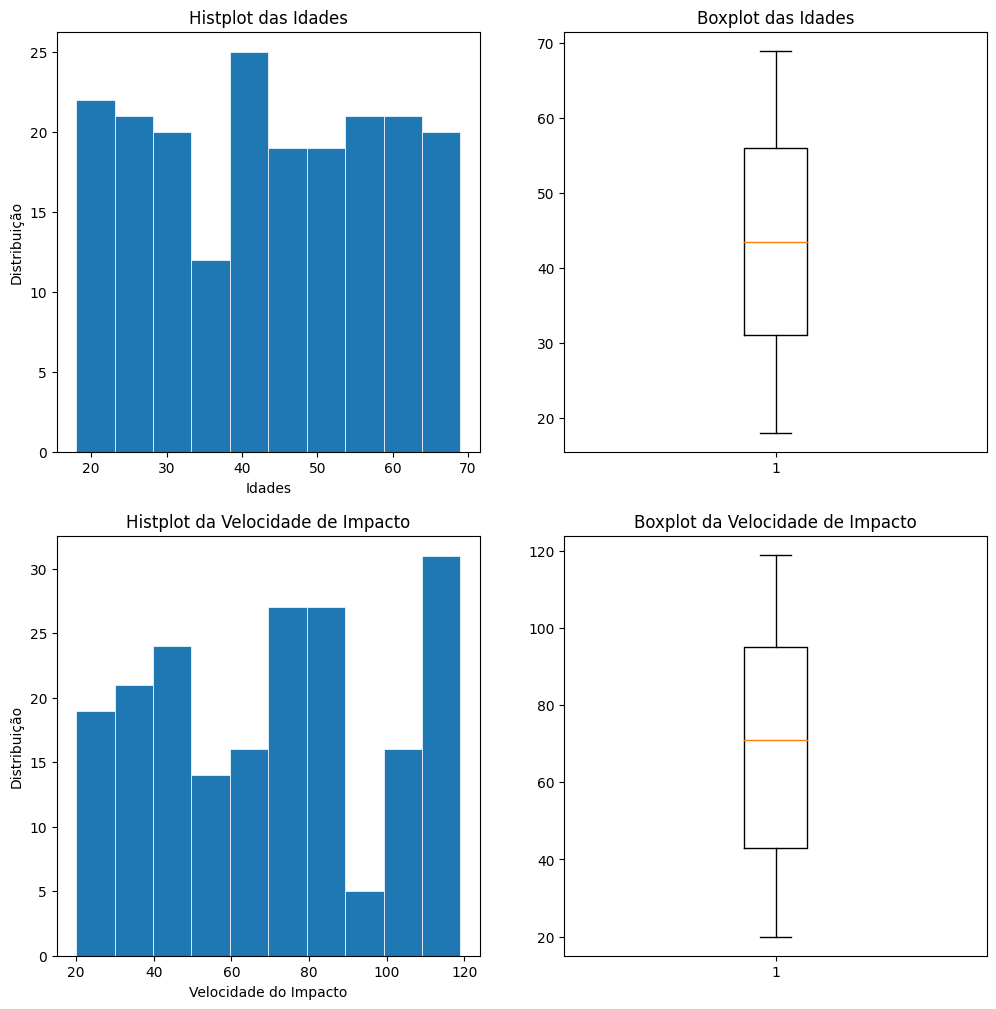

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))
# Gráficos da coluna [Age]
axs[0,0].hist(dataframe_original['Age'], bins = 10, linewidth = 0.5, edgecolor = 'white')
axs[0,0].set(title = 'Histplot das Idades', xlabel = 'Idades', ylabel = 'Distribuição')
axs[0,1].boxplot(dataframe_original['Age'])
axs[0,1].set(title = 'Boxplot das Idades')
# Gráficos da coluna [Speed_of_Impact]
axs[1,0].hist(dataframe_original['Speed_of_Impact'], bins = 10, linewidth = 0.5, edgecolor = 'white')
axs[1,0].set(title = 'Histplot da Velocidade de Impacto', xlabel = 'Velocidade do Impacto', ylabel = 'Distribuição')
axs[1,1].boxplot(dataframe_original['Speed_of_Impact'])
axs[1,1].set(title = 'Boxplot da Velocidade de Impacto')

In [13]:
# Criação de uma cópia do dataframe que será utilizado nos modelos de machine learning
dataframe_copia = dataframe_original.copy()

# Transformação de Colunas Catégorias em Númericas

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoders = {}
for col in dataframe_copia.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    dataframe_copia[col] = le.fit_transform(dataframe_copia[col])
    label_encoders[col] = le

<Axes: >

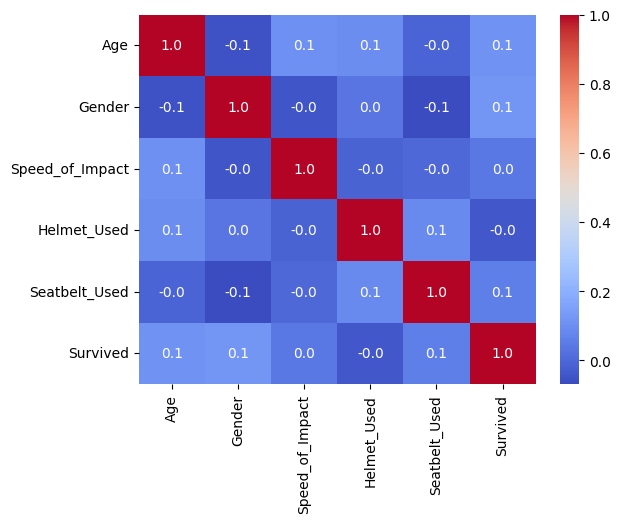

In [16]:
correlacao = dataframe_copia.corr()
sns.heatmap(correlacao, cmap = 'coolwarm', fmt = '.1f', annot = True)

In [17]:
dataframe_copia.head(3)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0


# Modelagem e Visualização dos Modelos de Machine Learning

In [18]:
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # Suport Machine Vector
from sklearn.naive_bayes import GaussianNB # Gaussian
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
modelos_valores = []
modelos_nomes = ['Árvore de Decisão', 'Random Forest', 'KNN', 'Suport Vector', 'Gaussian','LogisticRegression']
modelos = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), GaussianNB(),LogisticRegression()]

In [20]:
X = dataframe_copia.iloc[:, 0:4].values
y = dataframe_copia.iloc[:, -1].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
for i in range(len(modelos)):
    modelos[i].fit(X_train, y_train)
    y_pred = modelos[i].predict(X_test)
    modelos_valores.append(accuracy_score(y_test, y_pred))

In [23]:
modelos_valores

[0.425, 0.45, 0.475, 0.425, 0.5, 0.5]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Árvore de Decisão'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'Suport Vector'),
  Text(4, 0, 'Gaussian'),
  Text(5, 0, 'LogisticRegression')])

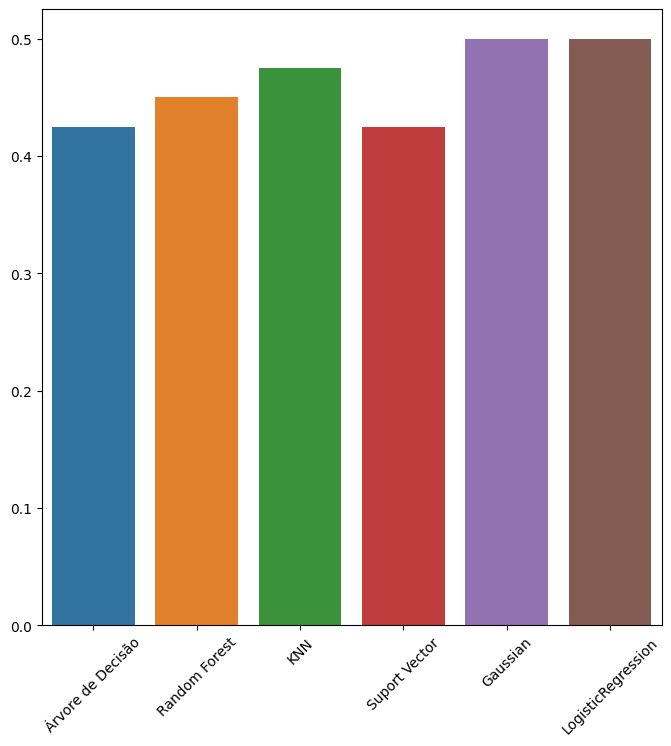

In [24]:
plt.figure(figsize = (8,8))
sns.barplot(data = dataframe_copia, x = modelos_nomes, y = modelos_valores)
plt.xticks(rotation = 45)

# Conclusões

***1 - Os modelos de classificação Gaussian e LogisticRegression apresentaram acurácia semelhantes igual a 0.5, como o dataset tem poucos dados com 200 instâncias, algumas modificações usando hiper parâmetros é possível aumentar esse valor.***

***2 - O dataset é muito bom para estudos, testar os modelos de classificação e a construção de gráficos.***